# Prediction  of Attrition 

## 1. Import Libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib.inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from skleran.metrics import confusion_matrix , precision_score , recall_score , f1_score ,classification_report

UsageError: Line magic function `%` not found.


## 2. Data Collection / import dataset

In [176]:
df = pd.read_csv('C:/Users/Pritam/Downloads/IBM Attrition Data.csv')

In [177]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


## 3.Exploratory Data Analyasis

### 1.Head

In [178]:
df.head(5)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


### 2.Tail

In [179]:
df.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


### 3. Shape 

In [180]:
df.shape

(1470, 13)

### 4.size

In [181]:
df.size

19110

### 5.dtypes

In [182]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

### 6.columns

In [183]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

### 7. Info

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


### 8. Check missing values

In [185]:
df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

### 9. skewness

In [186]:
df.skew()

C:\Users\Pritam\AppData\Local\Temp/ipykernel_6180/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                        0.413286
DistanceFromHome           0.958118
Education                 -0.289681
EnvironmentSatisfaction   -0.321654
JobSatisfaction           -0.329672
MonthlyIncome              1.369817
NumCompaniesWorked         1.026471
WorkLifeBalance           -0.552480
YearsAtCompany             1.764529
dtype: float64

### 10. duplicates

In [187]:
df.duplicated().sum()

0

### 11. unique values

In [188]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [189]:
unique_values = df['Attrition'].value_counts().index

In [190]:
unique_values

Index(['No', 'Yes'], dtype='object')

### 12. Describe

In [191]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


### 13. Correleation

In [192]:
df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


<AxesSubplot:>

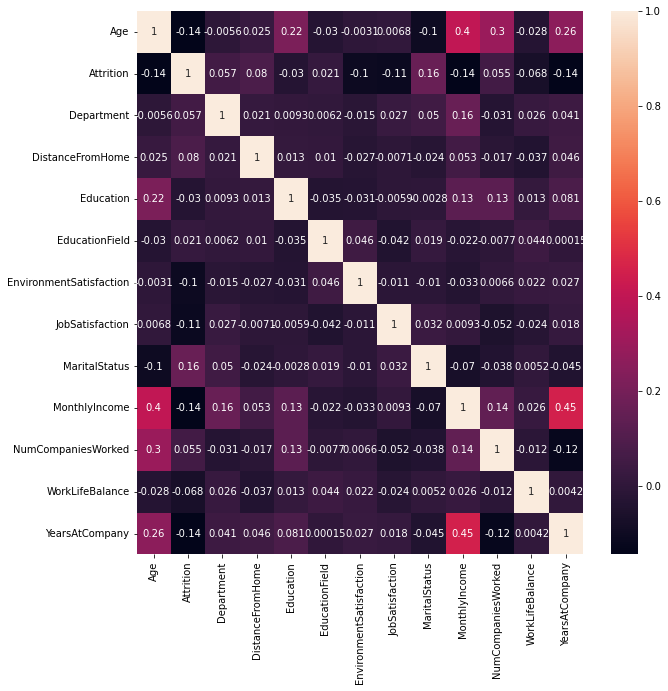

In [408]:
plt.figure(figsize = (10, 10))
import seaborn as sns
sns.heatmap(df.corr() , annot = True )

In [194]:
int_data = df.select_dtypes(include = 'int64' )
float_data = df.select_dtypes(include = 'object')

In [195]:
int_data

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,2,4,5993,8,1,6
1,49,8,1,3,2,5130,1,3,10
2,37,2,2,4,3,2090,6,3,0
3,33,3,4,4,3,2909,1,3,8
4,27,2,1,1,2,3468,9,3,2
...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2571,4,3,5
1466,39,6,1,4,1,9991,4,3,7
1467,27,4,3,2,2,6142,1,3,6
1468,49,2,3,4,2,5390,2,2,9


In [196]:
float_data

,Attrition,Department,EducationField,MaritalStatus
0,Yes,Sales,Life Sciences,Single
1,No,Research & Development,Life Sciences,Married
2,Yes,Research & Development,Other,Single
3,No,Research & Development,Life Sciences,Married
4,No,Research & Development,Medical,Married
...,...,...,...,...
1465,No,Research & Development,Medical,Married
1466,No,Research & Development,Medical,Married
1467,No,Research & Development,Life Sciences,Married
1468,No,Sales,Medical,Married


## 3.Data Visualisation

### 1. Countplot

In [197]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

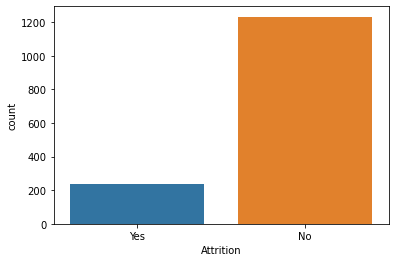

In [198]:
sns.countplot(df['Attrition'])

#### Data is highly imbalanced

In [199]:
label = df['Attrition'].value_counts().index

In [200]:
label

Index(['No', 'Yes'], dtype='object')

In [201]:
count = df['Attrition'].value_counts().values

In [202]:
count

array([1233,  237], dtype=int64)

### 2. Pieplot

([<matplotlib.patches.Wedge at 0x29d7c142760>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.6995575805220109, 0.38809688421087607, ' 84 %'),
  Text(0.5246681853915082, -0.2910726631581571, ' 16 %')])

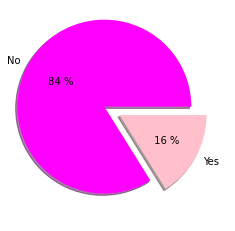

In [203]:
plt.pie(count , labels = label , explode = (0.2 , 0) , shadow = True , colors = ['magenta' , 'pink']  ,autopct = '% 1.0f %%')

### 3. Pairplot : To plot relation in pairwise

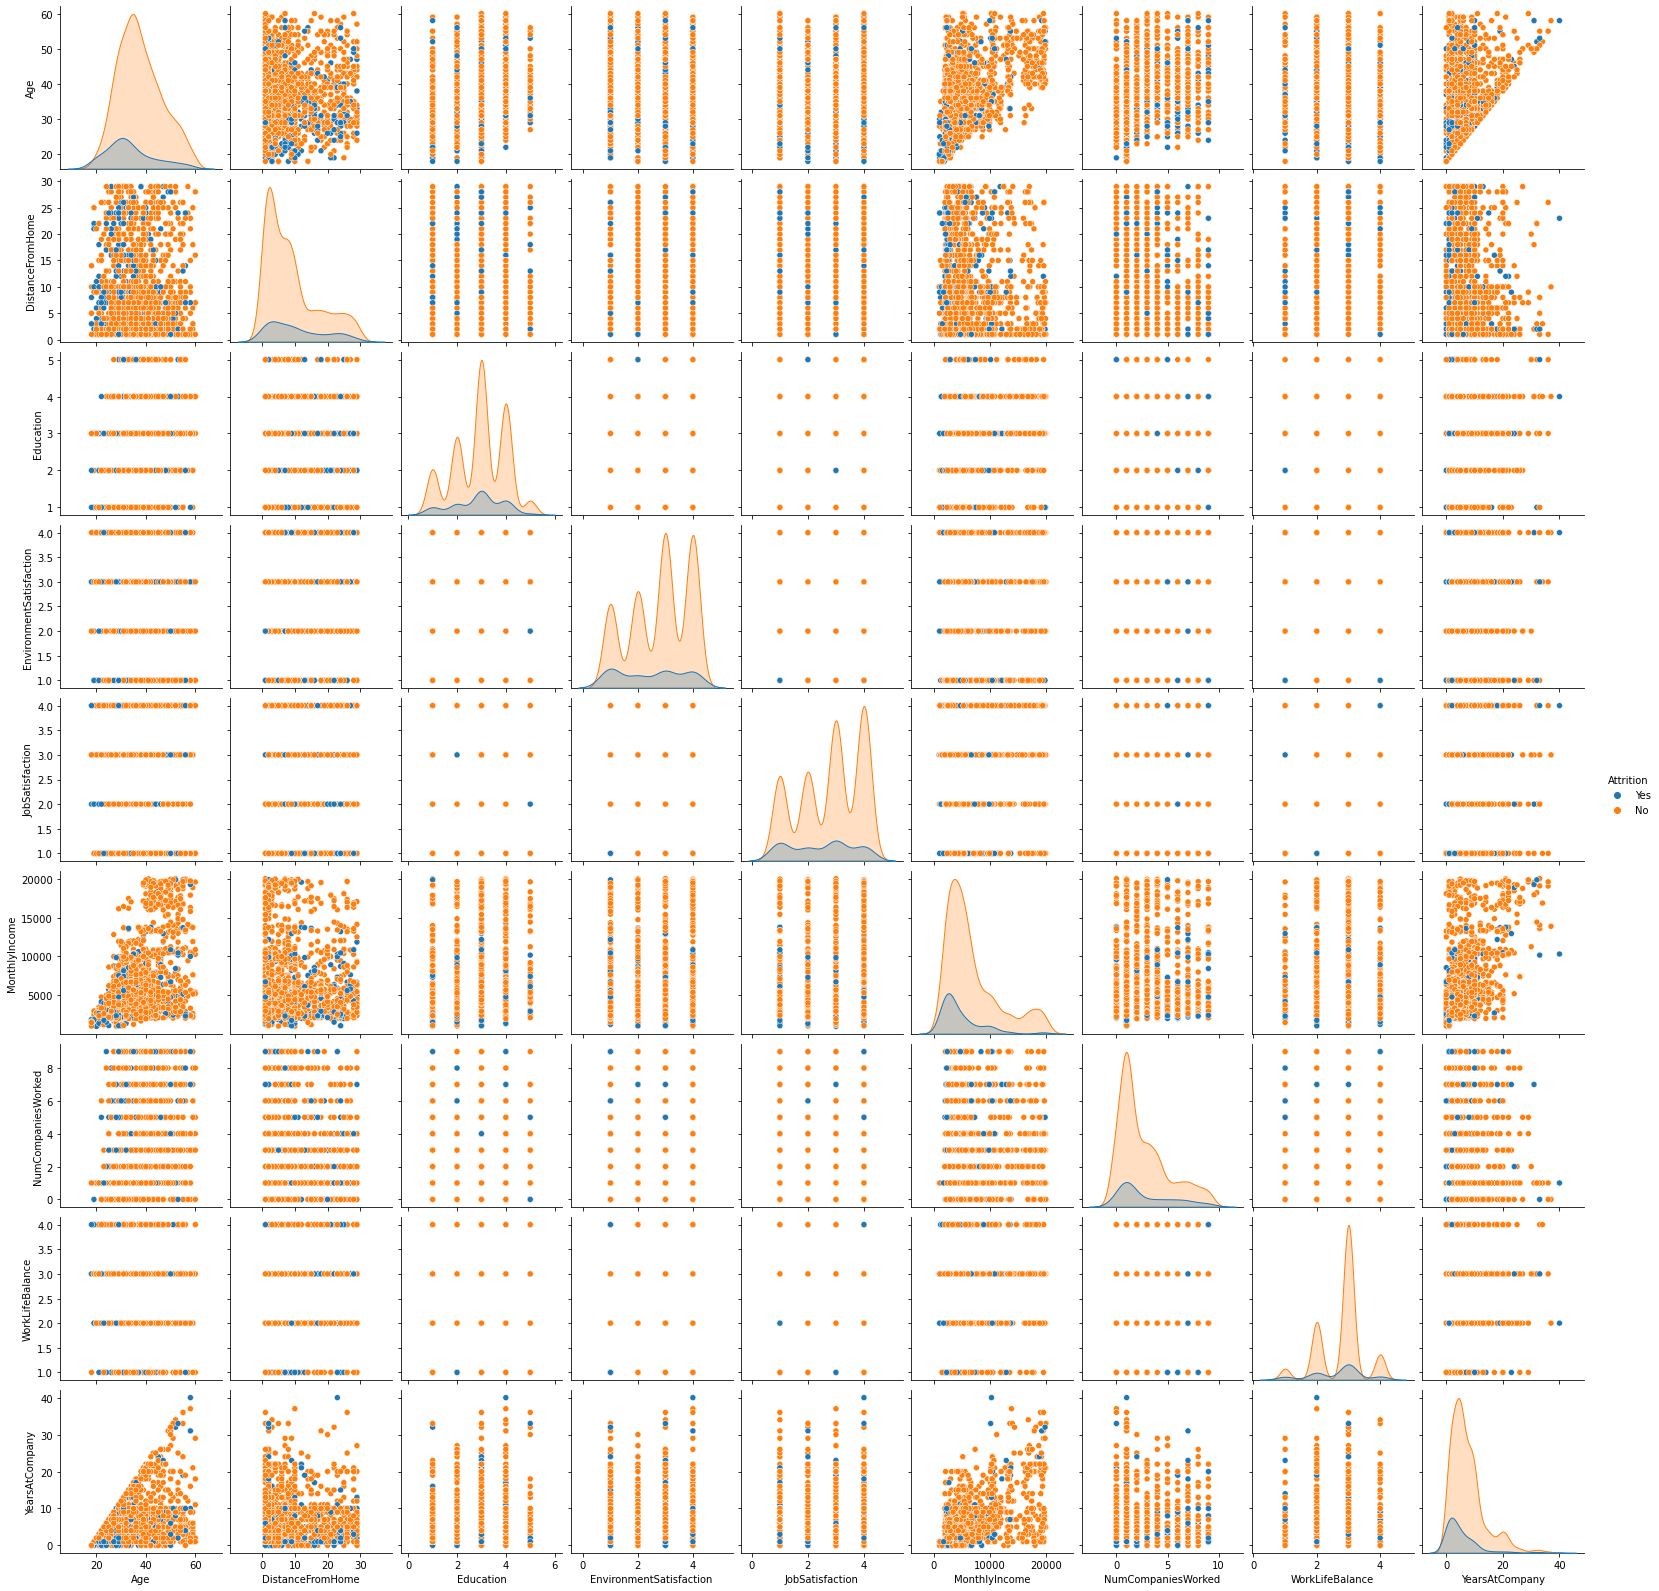

In [204]:
sns.pairplot(df , hue = 'Attrition')

### 4.Histplot : To show distribution of dataset

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>]], dtype=object)

<Figure size 720x1440 with 0 Axes>

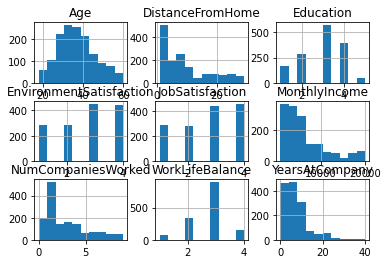

In [205]:
plt.figure(figsize = (10 , 20))
df.hist()

In [206]:
# .histplot(df , kde = True)

### 5.Boxplot

<AxesSubplot:>

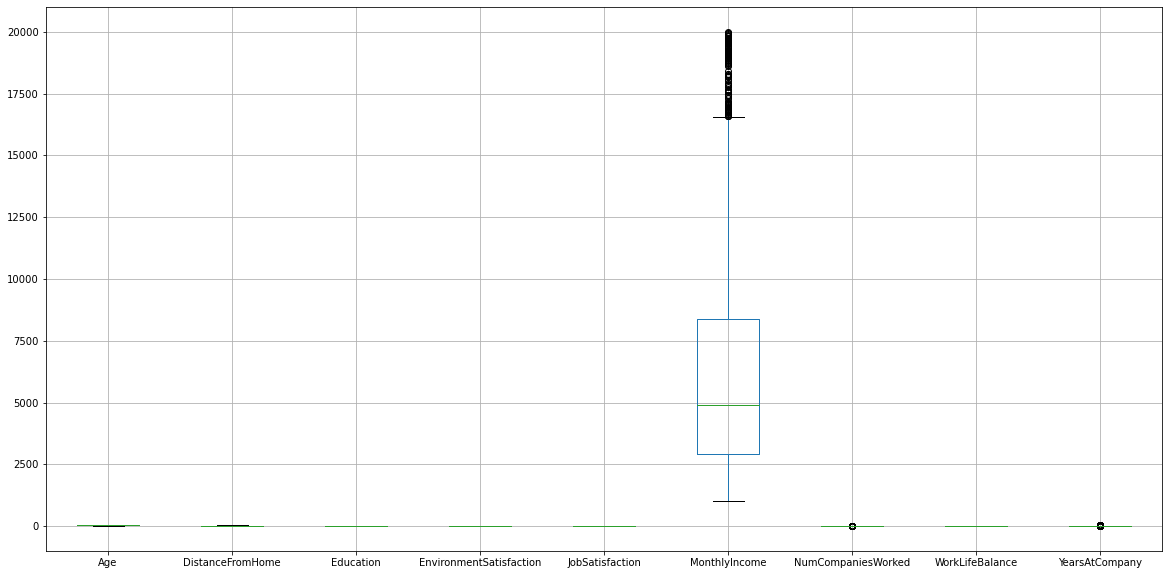

In [207]:
#sns.boxplot(df , hue = 'Attrition')
plt.figure(figsize = (20 ,10))

df.boxplot()

## 4. Data Preprocessing

### How to trate with outliers

### 1.Visualise

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

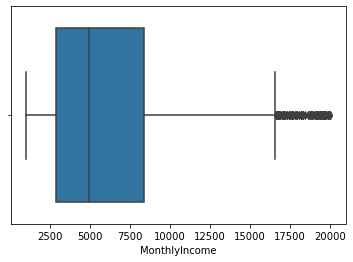

In [208]:
sns.boxplot(df['MonthlyIncome'])

### 2.skewness

In [209]:
print('skewness of MonthlyIncome is :' ,df['MonthlyIncome'].skew())

skewness of MonthlyIncome is : 1.3698166808390662


### 3.IQR : Interquartile range

In [210]:
Q1 = np.percentile(df['MonthlyIncome'] , 25 , interpolation= 'midpoint')
Q2 = np.percentile(df['MonthlyIncome'] , 50 , interpolation = 'midpoint')
Q3 = np.percentile(df['MonthlyIncome'] , 75 , interpolation = 'midpoint')

print('Q1 is :' , Q1)
print('Q2 is :' , Q2)
print('Q3 is :' , Q3)

IQR = Q3 - Q1

print('Interquartile range (IQR) is :' , IQR)

whisker_width = 1.5


low_lim = Q1 - (whisker_width * IQR)

high_lim = Q3 + (whisker_width * IQR)

print('Minimum value of MonthlyIncome is :' , low_lim)
print('Maximum value of monthlyIncome is :' , high_lim)



Index = df[(df['MonthlyIncome'] > high_lim) | (df['MonthlyIncome'] < low_lim)].index

print(Index)

print('shape of dataset before droping outliers:' , df.shape)


df.drop(labels = Index , axis = 0 , inplace = True)


print('shape of dataset after dropping outliers:' , df.shape)



Q1 is : 2911.0
Q2 is : 4919.0
Q3 is : 8378.0
Interquartile range (IQR) is : 5467.0
Minimum value of MonthlyIncome is : -5289.5
Maximum value of monthlyIncome is : 16578.5
Int64Index([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,
            ...
            1277, 1330, 1331, 1348, 1351, 1374, 1377, 1401, 1437, 1443],
           dtype='int64', length=114)
shape of dataset before droping outliers: (1470, 13)
shape of dataset after dropping outliers: (1356, 13)


### LabelEncoder

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
label = LabelEncoder()

In [213]:
df.head(2)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10


In [214]:
df['Attrition'] = label.fit_transform(df['Attrition'])
df['Department'] = label.fit_transform(df['Department'])
df['EducationField'] = label.fit_transform(df['EducationField'])
df['MaritalStatus'] = label.fit_transform(df['MaritalStatus'])

In [215]:
df.head(2)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10


### Data split into independent and dependent variable

In [216]:
x = df.drop(labels = 'Attrition' , axis = 1)

In [217]:
y = df.loc[:, 'Attrition']

In [218]:
x.head(2)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2,1,2,1,2,4,2,5993,8,1,6
1,49,1,8,1,1,3,2,1,5130,1,3,10


In [219]:
y.head(2)

0    1
1    0
Name: Attrition, dtype: int32

### Data split into train and test

In [220]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 42)

In [221]:
x_train.head(2)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
57,35,1,23,4,3,3,1,1,4014,3,3,2
1421,47,1,1,1,3,3,2,1,11957,0,1,13


In [222]:
y_train.head(2)

57      0
1421    0
Name: Attrition, dtype: int32

In [223]:
x_test.head(2)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
52,44,2,1,5,2,2,1,0,5454,5,2,4
984,28,2,26,3,1,3,1,1,4724,1,3,5


In [224]:
y_test.head(2)

52     0
984    0
Name: Attrition, dtype: int32

### Feature Engineering

### Feature selection plot

In [225]:
from sklearn.feature_selection import f_classif

In [226]:
from sklearn.feature_selection import SelectKBest

In [227]:
model_f = SelectKBest(f_classif , k = 'all')

In [228]:
model_f

SelectKBest(k='all')

In [229]:
model_f.fit(x_train, y_train)

SelectKBest(k='all')

In [230]:
model_f.scores_

array([17.83857806,  3.88727905,  5.9946752 ,  0.5261804 ,  0.57465529,
       11.88411324, 13.60277257, 23.49827855, 20.03618693,  4.96518377,
        2.51724646, 16.56900591])

In [231]:
Score = pd.DataFrame(model_f.scores_ , columns = ['Score'])

In [232]:
Score

,Score
0,17.838578
1,3.887279
2,5.994675
3,0.526180
4,0.574655
5,11.884113
6,13.602773
7,23.498279
8,20.036187
9,4.965184


In [233]:
Features = pd.DataFrame(x.columns , columns = ['Features'])

In [234]:
Features

,Features
0,Age
1,Department
2,DistanceFromHome
3,Education
4,EducationField
5,EnvironmentSatisfaction
6,JobSatisfaction
7,MaritalStatus
8,MonthlyIncome
9,NumCompaniesWorked


In [235]:
Feature_importance_score = pd.concat([Features , Score] ,axis = 1)

In [236]:
Feature_importance_score

,Features,Score
0,Age,17.838578
1,Department,3.887279
2,DistanceFromHome,5.994675
3,Education,0.526180
4,EducationField,0.574655
5,EnvironmentSatisfaction,11.884113
6,JobSatisfaction,13.602773
7,MaritalStatus,23.498279
8,MonthlyIncome,20.036187
9,NumCompaniesWorked,4.965184


In [237]:
Feature_importance_score_nlarge = Feature_importance_score.nlargest(12 , 'Score')

In [238]:
Feature_importance_score_nlarge

,Features,Score
7,MaritalStatus,23.498279
8,MonthlyIncome,20.036187
0,Age,17.838578
11,YearsAtCompany,16.569006
6,JobSatisfaction,13.602773
5,EnvironmentSatisfaction,11.884113
2,DistanceFromHome,5.994675
9,NumCompaniesWorked,4.965184
1,Department,3.887279
10,WorkLifeBalance,2.517246


### Feature Importance Plot

<BarContainer object of 12 artists>

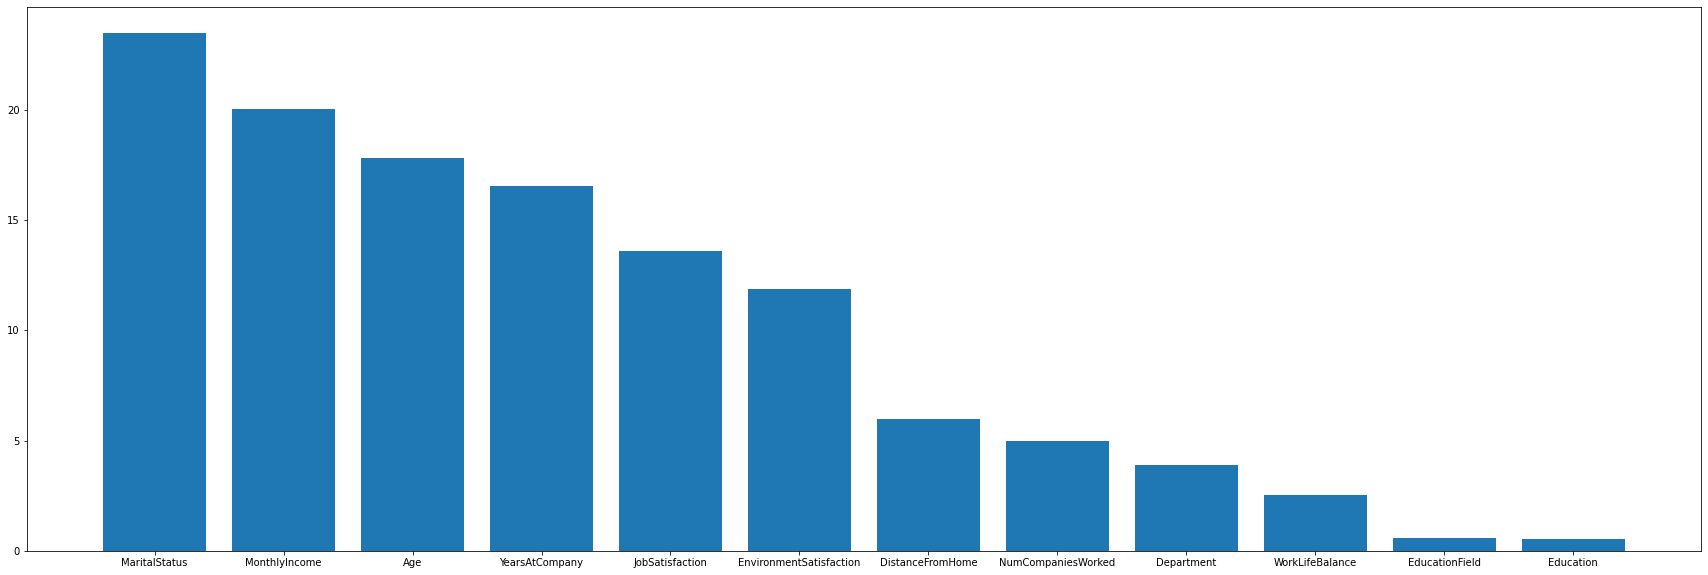

In [239]:
plt.figure(figsize = (30,10))
plt.bar(Feature_importance_score_nlarge['Features'] , Feature_importance_score_nlarge['Score'])

In [240]:
df.head(2)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10


### Data split into independent variable and dependent variable

In [241]:
x = df.drop(labels = ['Attrition' , 'EducationField' ,'Education'] , axis = 1 )

In [243]:
x.head(2)

,Age,Department,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2,1,2,4,2,5993,8,1,6
1,49,1,8,3,2,1,5130,1,3,10


In [246]:
y.head(2)

0    1
1    0
Name: Attrition, dtype: int32

## 5. Model Building

### Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
logic = LogisticRegression()

### Fit training data

In [249]:
logic.fit(x_train , y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [250]:
y_pred = logic.predict(x_test)

In [251]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Training Accuracy

In [259]:
Training_accuracy = logic.score(x_train, y_train)

In [260]:
Training_accuracy

0.8385608856088561

In [261]:
Testing_accuracy = logic.score(x_test , y_test)

In [262]:
Testing_accuracy

0.8345588235294118

### Navie Bayes

In [373]:
from sklearn.naive_bayes import MultinomialNB

In [374]:
naive = MultinomialNB()

### Fit the training data

In [375]:
naive.fit(x_train , y_train)

MultinomialNB()

### Prediction Output by naive_bayes

In [376]:
y_pred = naive.predict(x_test)

In [377]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1])

### Training Accuracy

In [378]:
Training_accuracy = naive.score(x_train , y_train)

In [379]:
Training_accuracy

0.5931734317343174

In [380]:
Testing_accuracy = naive.score(x_test , y_test)

In [381]:
Testing_accuracy

0.6397058823529411

### KNearest neighbors Classifier

In [284]:
from sklearn.neighbors import KNeighborsClassifier

In [285]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [286]:
knn

KNeighborsClassifier()

### Fit the training data

In [289]:
knn.fit(x_train  , y_train)

KNeighborsClassifier()

### Training Accuracy

In [290]:
Training_accuracy = knn.score(x_train , y_train)

In [291]:
Training_accuracy

0.8505535055350554

In [293]:
Testing_accuracy = knn.score(x_test , y_test)

In [294]:
Testing_accuracy

0.7794117647058824

In [295]:
error_rate = []
k_list = []
for k in range(1,40):
    knn_1 = KNeighborsClassifier(n_neighbors = k)
    knn_1.fit(x_train , y_train)
    knn_1_pred = knn_1.predict(x_test)
    error_rate.append(np.mean(knn_1_pred != y_test))
    k_list.append(k)

In [296]:
error_rate

[0.2647058823529412,
 0.19852941176470587,
 0.20588235294117646,
 0.20588235294117646,
 0.22058823529411764,
 0.20220588235294118,
 0.20588235294117646,
 0.19117647058823528,
 0.20955882352941177,
 0.20220588235294118,
 0.21323529411764705,
 0.19117647058823528,
 0.19852941176470587,
 0.1948529411764706,
 0.19852941176470587,
 0.19852941176470587,
 0.20588235294117646,
 0.19852941176470587,
 0.20588235294117646,
 0.19852941176470587,
 0.20955882352941177,
 0.19852941176470587,
 0.20220588235294118,
 0.20220588235294118,
 0.20220588235294118,
 0.20220588235294118,
 0.20220588235294118,
 0.19852941176470587,
 0.1948529411764706,
 0.18382352941176472,
 0.19117647058823528,
 0.1801470588235294,
 0.18382352941176472,
 0.18382352941176472,
 0.1948529411764706,
 0.1801470588235294,
 0.19117647058823528,
 0.1801470588235294,
 0.18382352941176472]

In [298]:
k_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [299]:
Best_error_rate = min(error_rate)

In [300]:
Best_error_rate

0.1801470588235294

In [308]:
Best_k = k_list[error_rate.index(Best_error_rate)]

In [309]:
Best_k

32

In [312]:
print('The optimum value of k is :' , Best_k , 'and  The error rate is :' , Best_error_rate)

The optimum value of k is : 32 and  The error rate is : 0.1801470588235294


### Identify k value

Text(0.5, 1.0, 'k vs error rate')

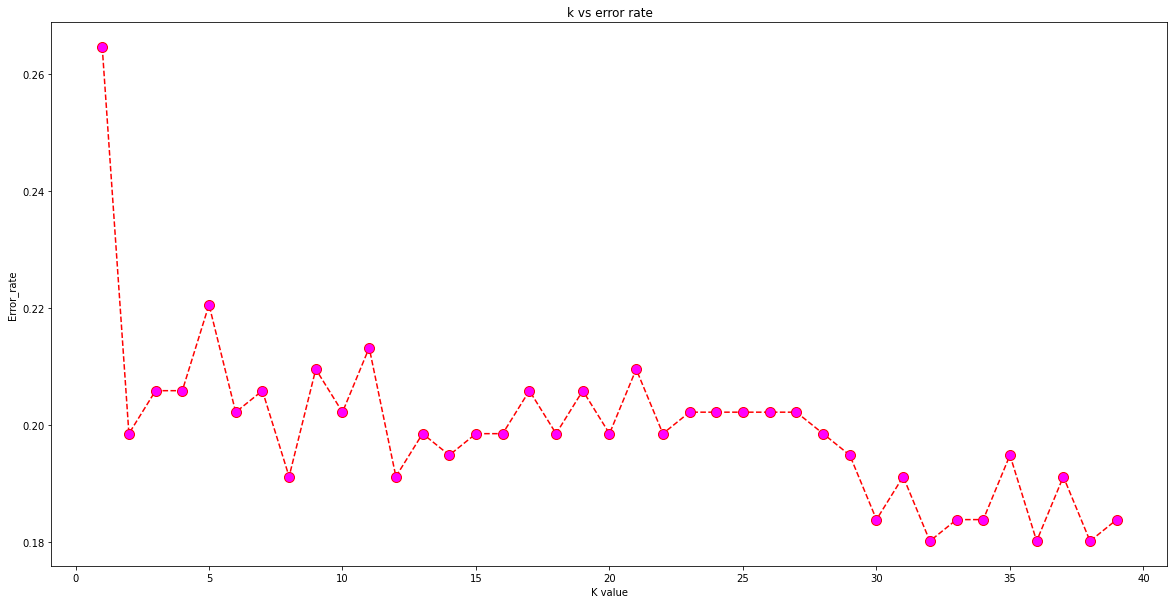

In [409]:
plt.figure(figsize = (20,10))
plt.plot(k_list , error_rate  , marker = 'o' , markersize = 10 , markerfacecolor ='magenta' , linestyle = '--' ,color = 'red' )
plt.xlabel('K value')
plt.ylabel('Error_rate')
plt.title('k vs error rate')

In [319]:
knn_2 = KNeighborsClassifier(n_neighbors = 32)
knn_2.fit(x_train , y_train)
y_pred_k = knn_2.predict(x_test)

In [320]:
y_pred_k

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Training Accuracy

In [323]:
Training_accuracy = knn_2.score(x_train , y_train)

In [324]:
Training_accuracy

0.8311808118081181

In [325]:
Testing_accuracy = knn_2.score(x_test , y_test)

In [326]:
Testing_accuracy

0.8198529411764706

### Support Vector Machine

In [329]:
from sklearn import svm
from sklearn.svm import SVC

In [348]:
x.head(2)

,Age,Department,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2,1,2,4,2,5993,8,1,6
1,49,1,8,3,2,1,5130,1,3,10


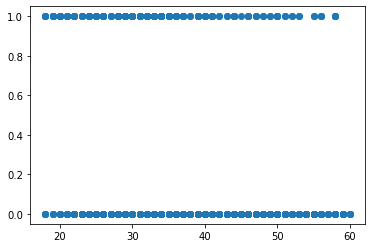

In [360]:
plt.scatter(df['Age'], df['Attrition'])
plt.show()

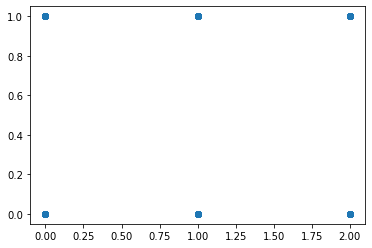

In [362]:
plt.scatter(df['Department'], df['Attrition'])
plt.show()

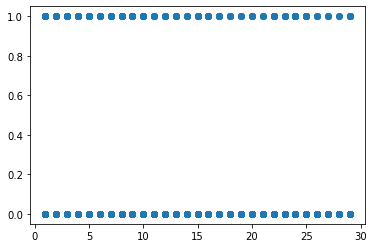

In [363]:
plt.scatter(df['DistanceFromHome'] , df['Attrition'])
plt.show()

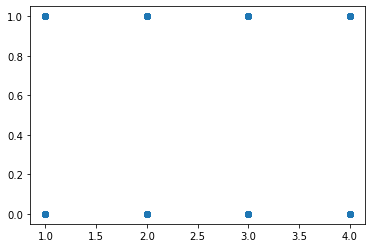

In [364]:
plt.scatter(df['EnvironmentSatisfaction'] , df['Attrition'])
plt.show()

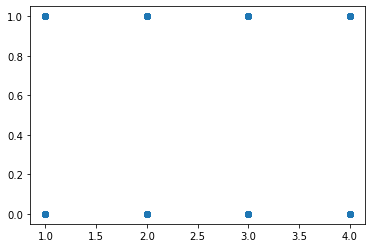

In [365]:
plt.scatter(df['JobSatisfaction'] , df['Attrition'])
plt.show()

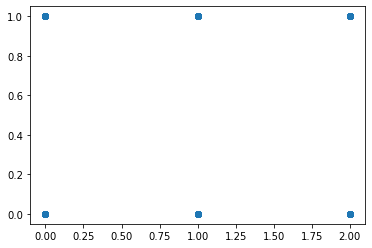

In [366]:
plt.scatter(df['MaritalStatus'] , df['Attrition'])
plt.show()

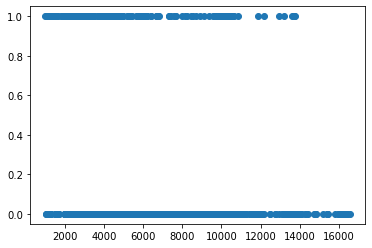

In [367]:
plt.scatter(df['MonthlyIncome'] , df['Attrition'])
plt.show()

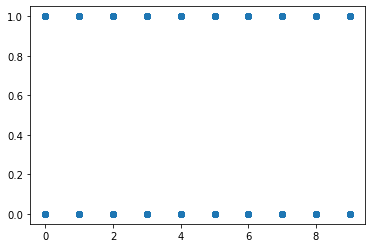

In [368]:
plt.scatter(df['NumCompaniesWorked'] , df['Attrition'])
plt.show()

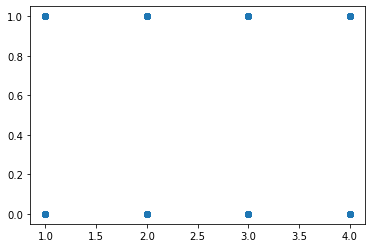

In [369]:
plt.scatter(df['WorkLifeBalance'] , df['Attrition'])
plt.show()

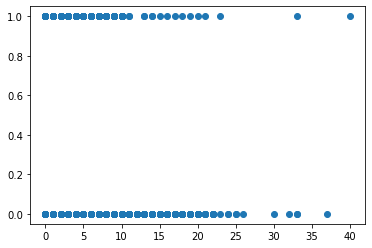

In [370]:
plt.scatter(df['YearsAtCompany'] , df['Attrition'])
plt.show()

In [384]:
svc = svm.SVC(kernel = 'linear')

In [385]:
svc.fit(x_train , y_train)

SVC(kernel='linear')

In [386]:
y_pred_svc = svc.predict(x_test)

In [387]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

### Training Accuracy

In [389]:
Training_accuracy = svc.score(x_train , y_train)

In [390]:
Training_accuracy

0.8413284132841329

### Testing_Accuracy

In [391]:
Testing_accuracy = svc.score(x_test , y_test)

In [392]:
Testing_accuracy

0.8198529411764706

### RandomForest

In [394]:
from sklearn.ensemble import RandomForestClassifier

In [395]:
random = RandomForestClassifier()

## Fit the train data

In [396]:
random.fit(x_train , y_train)

RandomForestClassifier()

In [397]:
y_pred_r = random.predict(x_test)

In [398]:
y_pred_r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Training Accuracy

In [399]:
Training_accuracy  = random.score(x_train , y_train)

In [400]:
Training_accuracy

1.0

### Testing Accuracy

In [401]:
Testing_accuracy = random.score(x_test , y_test)

In [402]:
Testing_accuracy 

0.8125